2022-12-08 14:23:34.950527: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-08 14:23:34.950577: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


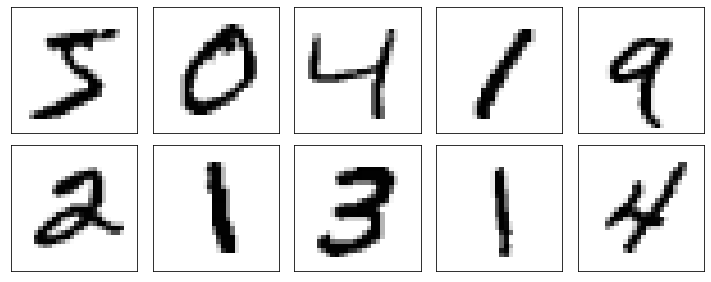

In [1]:
import tensorflow as tf
from tensorflow import keras


from keras.datasets import mnist

from matplotlib import pyplot as plt

import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

fig, axes = plt.subplots(2,5,figsize=(10,4)) #新建一个有10张子图的， 2行5列的画布
axes = axes.flatten() #axes中存储了每一个子图
for i in range(10):
    axes[i].imshow(x_train[i], cmap="gray_r") #将x_train的第i张图， 画在第1个子图上，反灰度图
    axes[i].set_xticks([])  #移除图像的x， y轴刻度
    axes[i].set_yticks([])
plt.tight_layout() #采用更紧凑美观的布局方式
plt.show()


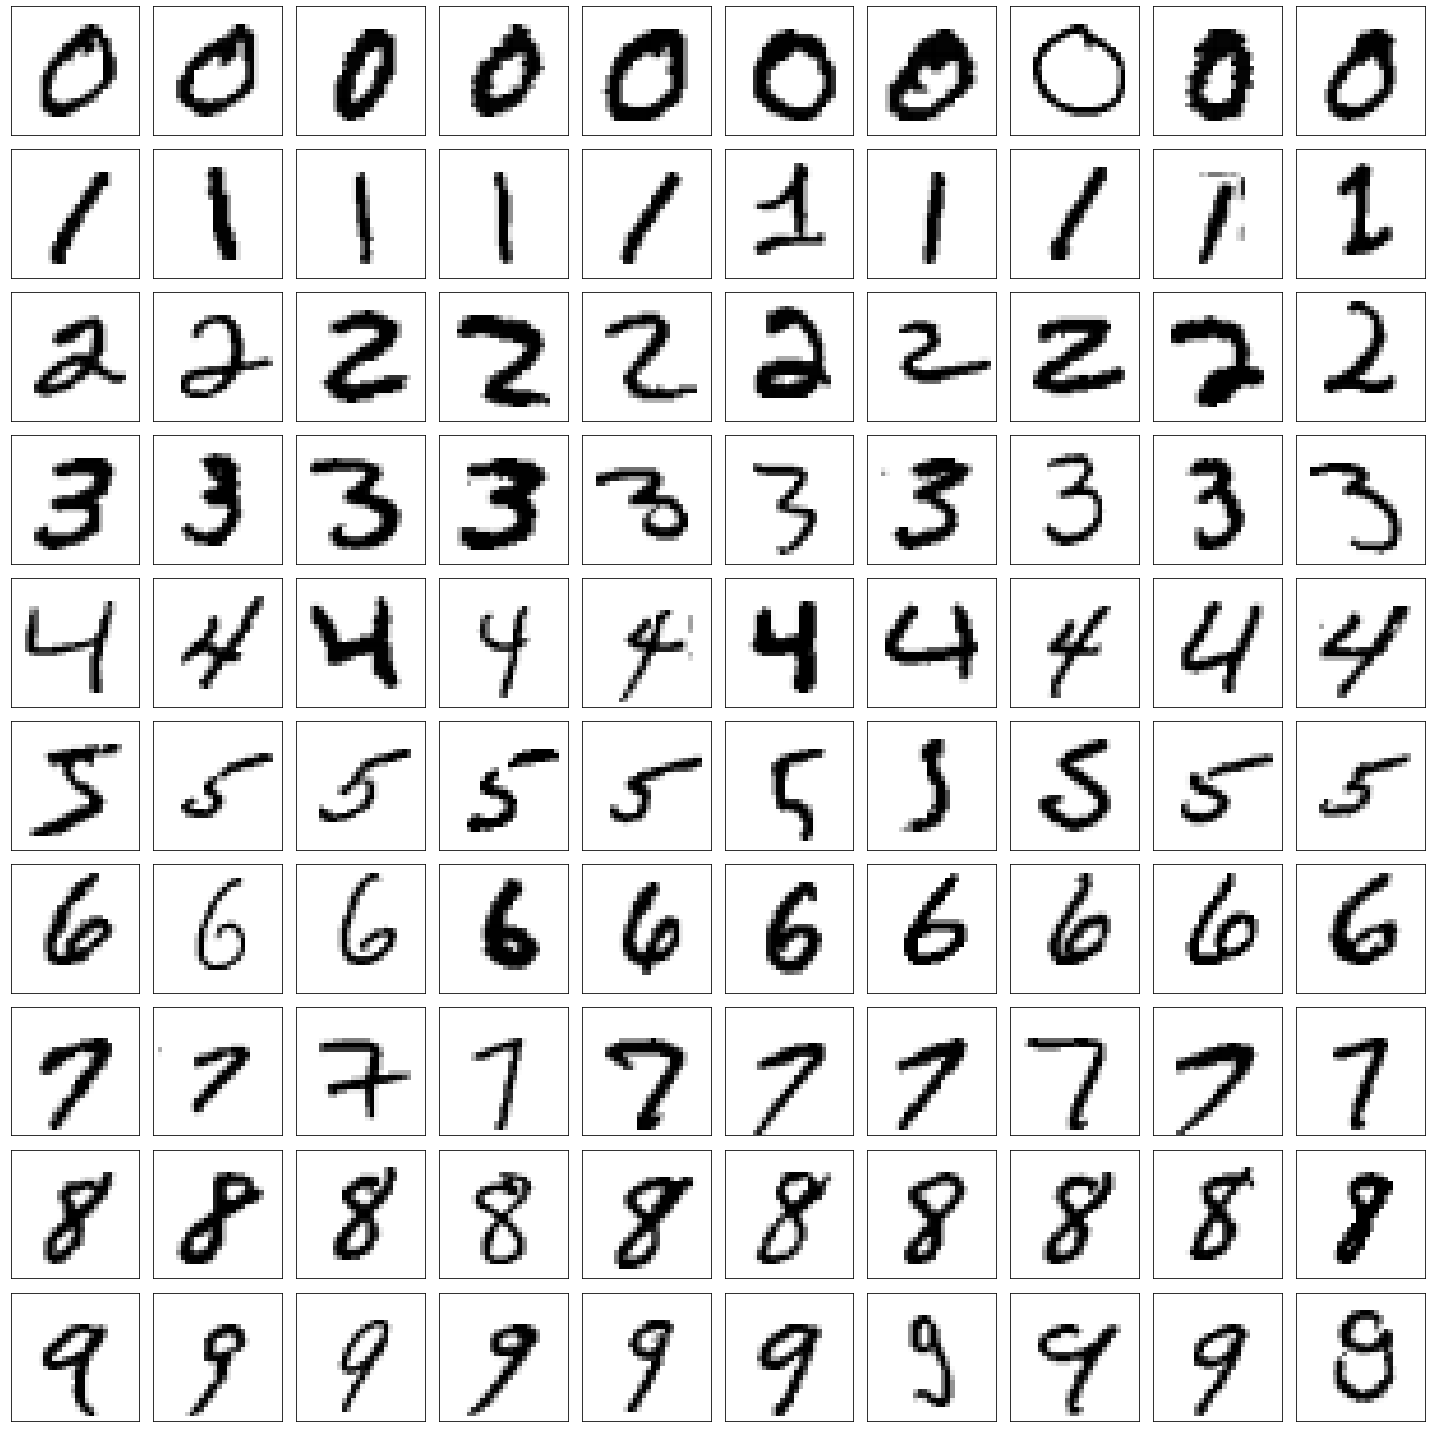

In [2]:
fig, axes = plt.subplots(10,10,figsize=(20,20)) #新建一个有100张子图的， 10行10列的画布

for i in range(10):
    indice = np.where(y_train==i)[0]
    for j in range(10):
        axes[i][j].imshow(x_train[indice[j]],cmap="gray_r")
        axes[i][j].set_xticks([])  #移除图像的x， y轴刻度
        axes[i][j].set_yticks([])
plt.tight_layout() #采用更紧凑美观的布局方式
plt.show()

In [3]:
from sklearn.neighbors import KNeighborsClassifier

k=5
knc=KNeighborsClassifier(n_neighbors=k)

ImportError: dlopen: cannot load any more object with static TLS
___________________________________________________________________________
Contents of /home/wenbin/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/__check_build:
setup.py                  __init__.py               _check_build.cpython-39-x86_64-linux-gnu.so
__pycache__
___________________________________________________________________________
It seems that scikit-learn has not been built correctly.

If you have installed scikit-learn from source, please do not forget
to build the package before using it: run `python setup.py install` or
`make` in the source directory.

If you have used an installer, please check that it is suited for your
Python version, your operating system and your platform.

In [ ]:
n_train=x_train.shape[0]
n_test=x_test.shape[0]
print(x_train.shape)
print(type(x_train))
x_train_1=x_train.reshape(n_train,-1)  #-1表示最后一个维度让电脑自己算
x_test_1=x_test.reshape(n_test, -1)
print(x_train_1.shape)

In [ ]:
#开始训练
import time

start_time=time.time()
print("pre fit:" + str(start_time))

knc.fit(x_train_1, y_train)

end_time=time.time()
print("fit done:"+str(end_time))
print("duration:" + str(end_time-start_time))

In [ ]:
n_to_predict=1000
y_predict=knc.predict(x_test_1[0:n_to_predict])
print(y_predict)

In [ ]:
print(y_predict[0:n_to_predict].shape)
print(y_test[0:n_to_predict].shape)
accuracy= np.sum(y_predict[0:n_to_predict]==y_test[0:n_to_predict])/ n_to_predict
print(accuracy)

In [ ]:
error_id=np.random.choice(np.where(y_predict[0:n_to_predict] !=y_test[0:n_to_predict])[0], size=10)
print(error_id)
fig, axes=plt.subplots(2,5, figsize=(10,4))
# print(axes.shape)
axes=axes.flatten()
# print(axes.shape)
for i, idx in enumerate(error_id):
    axes[i].imshow(x_test[idx].reshape(28,28), cmap="gray_r")
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title("y_predict: %d\ny_test:%d" % (y_predict[idx], y_test[idx]))
plt.tight_layout()
plt.show()
    